In [1166]:
import pandas as pd
import numpy as np

In [1167]:
train = pd.read_csv("../input/train.csv")
test = pd.read_csv('../input/test.csv')

In [1168]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1169]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1171]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1172]:
train.groupby('Pclass')['Survived'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Pclass,,,
1,136,0.629630,0.484026
2,87,0.472826,0.500623
3,119,0.242363,0.428949


In [1173]:
one_hot = pd.get_dummies(train['Pclass'])
one_hot

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


In [1174]:
train = train.drop('Pclass',axis = 1)
train

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [1175]:
train = train.join(one_hot)
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [1176]:
#train = train.rename(columns={'1':'Pclass_1','2':'Pclass_2','3':'Pclass_3'}, inplace=True)

In [1177]:
train.columns = ['Pclass_1' if x==1 else x for x in train.columns]
train.columns = ['Pclass_2' if x==2 else x for x in train.columns]
train.columns = ['Pclass_3' if x==3 else x for x in train.columns]
train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [1178]:
one_hot_pclass = pd.get_dummies(test['Pclass'])
test = test.drop('Pclass',axis = 1)
test = test.join(one_hot_pclass)
test.columns = ['Pclass_1' if x==1 else x for x in test.columns]
test.columns = ['Pclass_2' if x==2 else x for x in test.columns]
test.columns = ['Pclass_3' if x==3 else x for x in test.columns]
test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [1179]:
train.groupby('Sex')['Survived'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Sex,,,
female,233,0.742038,0.438211
male,109,0.188908,0.391775


In [1180]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
train['Sex'] = lb_make.fit_transform(train['Sex'])

train.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [1181]:
test['Sex'] = lb_make.fit_transform(test['Sex'])

test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1,0
3,895,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [1182]:
train.groupby('Sex')['Survived'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Sex,,,
0,233,0.742038,0.438211
1,109,0.188908,0.391775


In [1183]:
one_hot_Sex = pd.get_dummies(train['Sex'])
train = train.drop('Sex',axis = 1)
train = train.join(one_hot_Sex)
train.columns = ['male' if x==1 else x for x in train.columns]
train.columns = ['female' if x==0 else x for x in train.columns]
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


In [1184]:
one_hot_Sext = pd.get_dummies(test['Sex'])
test = test.drop('Sex',axis = 1)
test = test.join(one_hot_Sext)
test.columns = ['male' if x==1 else x for x in test.columns]
test.columns = ['female' if x==0 else x for x in test.columns]
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0


In [1185]:
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_1         0
Pclass_2         0
Pclass_3         0
female           0
male             0
dtype: int64

In [1186]:
test.isnull().sum()

PassengerId      0
Name             0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
female           0
male             0
dtype: int64

In [1187]:
train['Age'].fillna((train['Age'].mean()), inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_1         0
Pclass_2         0
Pclass_3         0
female           0
male             0
dtype: int64

In [1188]:
test['Age'].fillna((test['Age'].mean()), inplace=True)
test.isnull().sum()

PassengerId      0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
female           0
male             0
dtype: int64

In [1189]:
test['Fare'].fillna((test['Fare'].mean()), inplace=True)
test.isnull().sum()

PassengerId      0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
female           0
male             0
dtype: int64

In [1190]:
train.groupby('Embarked')['Survived'].agg([np.sum, np.mean, np.std])

,sum,mean,std
Embarked,,,
C,93,0.553571,0.498608
Q,30,0.389610,0.490860
S,217,0.336957,0.473037


In [1191]:
labels = train['Embarked'].astype('category').cat.categories.tolist()
replace_map_comp = {'Embarked' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'Embarked': {'C': 1, 'Q': 2, 'S': 3}}


In [1192]:
train.replace(replace_map_comp, inplace=True)

train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,3.0,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.0,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,3.0,0,0,1,0,1


In [1193]:
labelst = test['Embarked'].astype('category').cat.categories.tolist()
replace_map_compt = {'Embarked' : {k: v for k,v in zip(labelst,list(range(1,len(labelst)+1)))}}
test.replace(replace_map_compt, inplace=True)

test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,2,0,0,1,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,3,0,0,1,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,2,0,1,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,3,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,3,0,0,1,1,0


In [1194]:
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Pclass_1         0
Pclass_2         0
Pclass_3         0
female           0
male             0
dtype: int64

In [1195]:
train['Embarked'].fillna((train['Embarked'].min()), inplace=True)
train.isnull().sum()

PassengerId      0
Survived         0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Pclass_1         0
Pclass_2         0
Pclass_3         0
female           0
male             0
dtype: int64

In [1196]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(train['Embarked'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

   1.0  2.0  3.0
0    0    0    1
1    1    0    0
2    0    0    1
3    0    0    1
4    0    0    1


In [1197]:
train = pd.concat([train, lb_results_df], axis=1)

print(train.head())

   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Embarked  Pclass_1  \
0  22.0      1      0         A/5 21171   7.2500   NaN       3.0         0   
1  38.0      1      0          PC 17599  71.2833   C85       1.0         1   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN       3.0         0   
3  35.0      1      0            113803  53.1000  C123       3.0         1   
4  35.0      0      0            373450   8.0500   NaN       3.0         0   

   Pclass_2  Pclass_3  female  male  1.0  2.0  3.0  
0  

In [1198]:
lbt = LabelBinarizer()
lbt_results = lbt.fit_transform(test['Embarked'])
lbt_results_df = pd.DataFrame(lbt_results, columns=lbt.classes_)

test = pd.concat([test, lbt_results_df], axis=1)

test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,Pclass_3,female,male,1,2,3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,2,0,0,1,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,3,0,0,1,1,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,2,0,1,0,0,1,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,3,0,0,1,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,3,0,0,1,1,0,0,0,1


In [1199]:
train = train.drop('Embarked',axis = 1)
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,female,male,1.0,2.0,3.0
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1


In [1200]:
train.columns = ['Emb_C' if x==1.0 else x for x in train.columns]
train.columns = ['Emb_Q' if x==2.0 else x for x in train.columns]
train.columns = ['Emb_S' if x==3.0 else x for x in train.columns]
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1


In [1201]:
test = test.drop('Embarked',axis = 1)
test.columns = ['Emb_C' if x==1.0 else x for x in test.columns]
test.columns = ['Emb_Q' if x==2.0 else x for x in test.columns]
test.columns = ['Emb_S' if x==3.0 else x for x in test.columns]
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0,0,0,1


In [1202]:
train_1 = train.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1


In [1203]:
test_1 = test.drop(['PassengerId','Name','Ticket','Cabin'],axis = 1)
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1


In [1204]:
train_1.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [1205]:
test_1.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [1206]:
test_1['Survived'] = 0

In [1207]:
test_1.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S,Survived
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1,0


In [1208]:
x_train = train_1.drop('Survived',axis = 1)
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [1209]:
y_train = train_1[['Survived']]
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [1210]:
x_test = test_1.drop('Survived',axis = 1)
x_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [1211]:
y_test = test_1[['Survived']]
y_test.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [1212]:
x_nb_train = x_train.copy()
y_nb_train = y_train.copy()
x_nb_test = x_test.copy()
y_nb_test = y_test.copy()
x_nb_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [1213]:
data_final_vars=train_1.columns.values.tolist()
y=['Survived']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(x_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1214]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1215]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       418
           1       0.00      0.00      0.00         0

    accuracy                           0.63       418
   macro avg       0.50      0.32      0.39       418
weighted avg       1.00      0.63      0.77       418



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [1216]:
#conda install statsmodels
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.440036
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.339     
Dependent Variable: Survived         AIC:              804.1442  
Date:               2019-12-31 15:36 BIC:              852.0676  
No. Observations:   891              Log-Likelihood:   -392.07   
Df Model:           9                LL-Null:          -593.33   
Df Residuals:       881              LLR p-value:      3.9895e-81
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age           -0.0391    0.0079  -4.9706  0.0000  -0.0546  -0.0237
SibSp         -0.3226    0.1097  -2.9416  0.0033  -0.5375  -0.

/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [1217]:
cols=['Age', 'SibSp', 'Parch','Fare'] 
x_train_1=x_train[cols]

In [1218]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train_1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.612925
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.080     
Dependent Variable: Survived         AIC:              1100.2329 
Date:               2019-12-31 15:36 BIC:              1119.4023 
No. Observations:   891              Log-Likelihood:   -546.12   
Df Model:           3                LL-Null:          -593.33   
Df Residuals:       887              LLR p-value:      2.4574e-20
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Age       -0.0294     0.0031   -9.5164   0.0000   -0.0355   -0.0234
SibSp     -0.3458     0.0825   -4.1925   0.0000   -0.5074 

In [1219]:
cols=['Age', 'SibSp', 'Fare'] 
x_train_2=x_train[cols]

In [1220]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train_2)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.613394
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.079     
Dependent Variable: Survived         AIC:              1099.0678 
Date:               2019-12-31 15:36 BIC:              1113.4448 
No. Observations:   891              Log-Likelihood:   -546.53   
Df Model:           2                LL-Null:          -593.33   
Df Residuals:       888              LLR p-value:      4.7617e-21
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Age       -0.0293     0.0031   -9.4912   0.0000   -0.0353   -0.0232
SibSp     -0.3172     0.0758   -4.1841   0.0000   -0.4658 

In [1221]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train_2, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [1222]:
x_test_1 = x_test[cols]

In [1223]:
y_pred = logreg.predict(x_test_1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test_1, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [1224]:
sub = pd.read_csv('../input/gender_submission.csv')
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1225]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1226]:
type(y_pred)

numpy.ndarray

In [1227]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [1228]:
sub[["Survived"]] = 0

In [1229]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1230]:
len(y_pred)

418

In [1231]:
len(sub)

418

In [1232]:
sub["test"] = y_pred

In [1233]:
old_names = ['PassengerId', 'Survived', 'test'] 
new_names = ['PassengerId', 'test', 'Survived']
sub.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [1234]:
sub.head()

,PassengerId,test,Survived
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,0,0


In [1235]:
sub_1 = sub.drop('test',axis = 1)
sub_1.head(n = 20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [1236]:
sub_1.to_csv('out_logistic_mahesh.csv')

In [1237]:
sub_1.columns

Index(['PassengerId', 'Survived'], dtype='object')

Systematic way

In [1238]:
#x_nb_train = x_train
#y_nb_train = y_train
#x_nb_test = x_test
#y_nb_test = y_test

In [1239]:
x_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [1240]:
x_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,34.5,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [1241]:
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [1242]:
y_test.head()

,Survived
0,0
1,0
2,0
3,0
4,0


In [1243]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train[['Age','Fare']] = scaler.fit_transform(x_train[['Age','Fare']])

x_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,-0.592481,1,0,-0.502445,0,0,1,0,1,0,0,1
1,0.638789,1,0,0.786845,1,0,0,1,0,1,0,0
2,-0.284663,0,0,-0.488854,0,0,1,1,0,0,0,1
3,0.407926,1,0,0.420730,1,0,0,1,0,0,0,1
4,0.407926,0,0,-0.486337,0,0,1,0,1,0,0,1


In [1244]:
x_test[['Age','Fare']] = scaler.fit_transform(x_test[['Age','Fare']])

x_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,0.334993,0,0,-0.498407,0,0,1,0,1,0,1,0
1,1.325530,1,0,-0.513274,0,0,1,1,0,0,0,1
2,2.514175,0,0,-0.465088,0,1,0,0,1,0,1,0
3,-0.259330,0,0,-0.483466,0,0,1,0,1,0,0,1
4,-0.655545,1,1,-0.418471,0,0,1,1,0,0,0,1


In [1245]:
#from sklearn.model_selection import train_test_split
# Splitting the data into train and test
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x_train, y_train, train_size=0.7, test_size=0.3, random_state=100)

In [1246]:
### Checking the life rate
life = (sum(y_train['Survived'])/len(y_train['Survived'].index))*100
life

38.38383838383838

In [1247]:
import statsmodels.api as sm

In [1248]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.07
Date:                Tue, 31 Dec 2019   Deviance:                       784.14
Time:                        15:36:47   Pearson chi2:                     907.
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2187      0.068      3.233      0.001       0.086       0.351
Age           -0.5087      0.102     -4.971      0.000      -0.709      -0.308
SibSp         -0.3226      0.110     -2.942      0.003      -0.537      -0.108
Parch         -0.0963      0.119     -0.809      0.418      -0.330       0.137
Fare           0.1127      0.123      0.920      0.358      -0.127       0.353
Pclass_1       1.0994      0.186      5.897      0.000       0.734       1.465
Pclass_2       0.1725      0.155      1.113      0.266      -0.131       0.476
Pclass_3      -1.0532      0.143     -7.364      0.000      -1.334      -0.773
female         1.4673      0.113     12.945      0.000       1.245       1.689
male          -1.2486      0.098    -12.696      0.000      -1.441      -1.056
Emb_C          0.2364      0.180      1.313      0.189      -0.116       0.589
Emb_Q          0.1986      0.236      0.841      0.400      -0.264       0.661
Emb_S         -0.2163      0.134     -1.617      0.106      -0.479       0.046
==============================================================================
"""

In [1249]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1250]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [1251]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [1252]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1),
 ('Pclass_1', True, 1),
 ('Pclass_2', True, 1),
 ('Pclass_3', True, 1),
 ('female', True, 1),
 ('male', True, 1),
 ('Emb_C', True, 1),
 ('Emb_Q', True, 1),
 ('Emb_S', True, 1)]

In [1253]:
col = x_train.columns[rfe.support_]
col

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'female', 'male', 'Emb_C', 'Emb_Q', 'Emb_S'],
      dtype='object')

In [1254]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1255]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
4,Pclass_1,inf
5,Pclass_2,inf
6,Pclass_3,inf
7,female,inf
8,male,inf
9,Emb_C,inf
10,Emb_Q,inf
11,Emb_S,inf
3,Fare,1.77
2,Parch,1.33


In [1256]:
col = col.drop(['Pclass_1','Pclass_2', 'Pclass_3', 'female','male','Emb_C','Emb_Q','Emb_S'], 1)
col

Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [1257]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      886
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -545.50
Date:                Tue, 31 Dec 2019   Deviance:                       1091.0
Time:                        15:36:48   Pearson chi2:                 1.03e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3178      0.089     -3.575      0.000      -0.492      -0.144
Age           -0.3051      0.080     -3.829      0.000      -0.461      -0.149
SibSp         -0.3190      0.085     -3.773      0.000      -0.485      -0.153
Parch          0.1098      0.099      1.106      0.269      -0.085       0.304
Fare           0.9310      0.132      7.060      0.000       0.673       1.189
==============================================================================
"""

In [1258]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,SibSp,1.41
2,Parch,1.41
0,Age,1.07
3,Fare,1.06


In [1259]:
# Let's drop TotalCharges since it has a high VIF
col = col.drop('Parch')
col

Index(['Age', 'SibSp', 'Fare'], dtype='object')

In [1260]:
# Let's re-run the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -546.10
Date:                Tue, 31 Dec 2019   Deviance:                       1092.2
Time:                        15:36:48   Pearson chi2:                 1.03e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2892      0.085     -3.405      0.001      -0.456      -0.123
Age           -0.3163      0.079     -4.000      0.000      -0.471      -0.161
SibSp         -0.2905      0.080     -3.632      0.000      -0.447      -0.134
Fare           0.9525      0.131      7.289      0.000       0.696       1.209
==============================================================================
"""

In [1261]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [1262]:
y_train_pred[:10]

array([0.29506687, 0.49193261, 0.33965154, 0.42360831, 0.29287009,
       0.32198899, 0.37668074, 0.3318263 , 0.34804217, 0.44064418])

In [1263]:
y_train.values[:10]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1]])

In [1264]:
y_train_pred_final = pd.DataFrame({'Survived':list(y_train.values), 'Survived_Prob':list(y_train_pred)})

In [1265]:
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId
0,[0],0.295067,0
1,[1],0.491933,1
2,[1],0.339652,2
3,[1],0.423608,3
4,[0],0.292870,4


In [1266]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted
0,[0],0.295067,0,0
1,[1],0.491933,1,0
2,[1],0.339652,2,0
3,[1],0.423608,3,0
4,[0],0.292870,4,0


In [1267]:
for i in range(len(y_train_pred_final.Survived)):
    y_train_pred_final.Survived[i] = np.int64(y_train_pred_final.Survived[i])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1268]:
# Let's see the head
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted
0,[0],0.295067,0,0
1,[1],0.491933,1,0
2,[1],0.339652,2,0
3,[1],0.423608,3,0
4,[0],0.292870,4,0


In [1269]:
type(y_train_pred_final.Survived)

pandas.core.series.Series

In [1270]:
type(y_train_pred_final.predicted)

pandas.core.series.Series

In [1271]:
#np.int64(y_train_pred_final.Survived)
type(y_train_pred_final.Survived[0])

numpy.ndarray

In [1272]:
type(y_train_pred_final.predicted[0])

numpy.int64

In [1273]:
len(y_train_pred_final.Survived)

891

In [1274]:
len(y_train_pred_final.predicted)

891

In [1275]:
y_train_pred_final.Survived

0      [0]
1      [1]
2      [1]
3      [1]
4      [0]
      ... 
886    [0]
887    [1]
888    [0]
889    [1]
890    [0]
Name: Survived, Length: 891, dtype: object

In [1276]:
y_train_pred_final.predicted

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: predicted, Length: 891, dtype: int64

In [1277]:
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted
0,[0],0.295067,0,0
1,[1],0.491933,1,0
2,[1],0.339652,2,0
3,[1],0.423608,3,0
4,[0],0.292870,4,0


In [1278]:
y_train_pred_final["Survived"][0]

array([0])

In [1279]:
#y_train_pred_final["Survived"] = pd.to_numeric(y_train_pred_final["Survived"])

In [1280]:
y_train_pred_final["Survived"] = y_train_pred_final["Survived"].astype(int)

In [1281]:
y_train_pred_final.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [1282]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[516  33]
 [248  94]]


In [1283]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.6846240179573513


In [1284]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1285]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.27485380116959063

In [1286]:
# Let us calculate specificity
TN / float(TN+FP)

0.9398907103825137

In [1287]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.060109289617486336


In [1288]:
# positive predictive value 
print (TP / float(TP+FP))

0.7401574803149606


In [1289]:
# Negative predictive value
print (TN / float(TN+ FN))

0.675392670157068


In [1290]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1291]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.predicted, drop_intermediate = False )

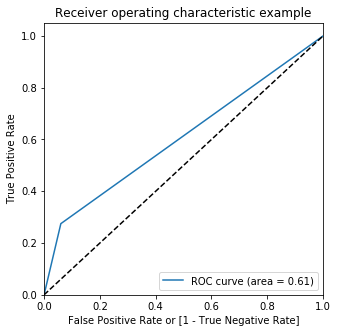

In [1292]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
draw_roc(y_train_pred_final.Survived, y_train_pred_final.predicted)

In [1293]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.295067,0,0,1,1,1,0,0,0,0,0,0,0
1,1,0.491933,1,0,1,1,1,1,1,0,0,0,0,0
2,1,0.339652,2,0,1,1,1,1,0,0,0,0,0,0
3,1,0.423608,3,0,1,1,1,1,1,0,0,0,0,0
4,0,0.292870,4,0,1,1,1,0,0,0,0,0,0,0


In [1294]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.383838  1.000000  0.000000
0.1   0.1  0.383838  1.000000  0.000000
0.2   0.2  0.396184  0.985380  0.029144
0.3   0.3  0.516274  0.868421  0.296903
0.4   0.4  0.712682  0.467836  0.865209
0.5   0.5  0.684624  0.274854  0.939891
0.6   0.6  0.664422  0.178363  0.967213
0.7   0.7  0.649832  0.119883  0.979964
0.8   0.8  0.634119  0.076023  0.981785
0.9   0.9  0.626263  0.046784  0.987250


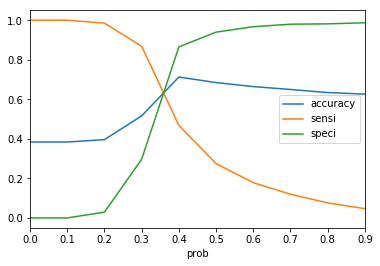

In [1295]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1296]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_Prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Survived,Survived_Prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.295067,0,0,1,1,1,0,0,0,0,0,0,0,0
1,1,0.491933,1,0,1,1,1,1,1,0,0,0,0,0,1
2,1,0.339652,2,0,1,1,1,1,0,0,0,0,0,0,0
3,1,0.423608,3,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.292870,4,0,1,1,1,0,0,0,0,0,0,0,0


In [1297]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7182940516273849

In [1298]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

array([[490,  59],
       [192, 150]])

In [1299]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1300]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.43859649122807015

In [1301]:
# Let us calculate specificity
TN / float(TN+FP)

0.8925318761384335

In [1302]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10746812386156648


In [1303]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7177033492822966


In [1304]:
# Negative predictive value
print (TN / float(TN+ FN))

0.718475073313783


In [1305]:
x_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,0.334993,0,0,-0.498407,0,0,1,0,1,0,1,0
1,1.325530,1,0,-0.513274,0,0,1,1,0,0,0,1
2,2.514175,0,0,-0.465088,0,1,0,0,1,0,1,0
3,-0.259330,0,0,-0.483466,0,0,1,0,1,0,0,1
4,-0.655545,1,1,-0.418471,0,0,1,1,0,0,0,1


In [1306]:
X_test = x_test[col]
X_test.head()

,Age,SibSp,Fare
0,0.334993,0,-0.498407
1,1.325530,1,-0.513274
2,2.514175,0,-0.465088
3,-0.259330,0,-0.483466
4,-0.655545,1,-0.418471


In [1307]:
X_test_sm = sm.add_constant(X_test)

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [1308]:
y_test_pred = res.predict(X_test_sm)

In [1309]:
y_test_pred[:10]

0    0.295272
1    0.184253
2    0.178380
3    0.339006
4    0.316269
5    0.417674
6    0.318525
7    0.357597
8    0.385408
9    0.302845
dtype: float64

In [1310]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1311]:
# Let's see the head
y_pred_1.head()

,0
0,0.295272
1,0.184253
2,0.178380
3,0.339006
4,0.316269


In [1312]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1313]:
# Putting CustID to index
y_test_df['PassengerId'] = test['PassengerId']

In [1314]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Survived,PassengerId,0
0,0,892,0.295272
1,0,893,0.184253
2,0,894,0.178380
3,0,895,0.339006
4,0,896,0.316269


In [1315]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_prob'})
y_pred_final.head()

,Survived,PassengerId,Survived_prob
0,0,892,0.295272
1,0,893,0.184253
2,0,894,0.178380
3,0,895,0.339006
4,0,896,0.316269


In [1316]:
y_pred_final['final_predicted'] = y_pred_final.Survived_prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final.head()

,Survived,PassengerId,Survived_prob,final_predicted
0,0,892,0.295272,0
1,0,893,0.184253,0
2,0,894,0.178380,0
3,0,895,0.339006,0
4,0,896,0.316269,0


In [1317]:
y_pred_final.drop(['Survived', 'Survived_prob'], axis=1, inplace=True)
y_pred_final.head()

,PassengerId,final_predicted
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [1318]:
# Rearranging the columns
y_pred_final['Survived'] = y_pred_final['final_predicted']
y_pred_final.drop(['final_predicted'], axis=1, inplace=True)
y_pred_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,0
9,901,0


In [1319]:
y_pred_final.to_csv('Sub_Titanic_LogisticRegression.csv', index=False)

In [1320]:
#x_nb_train
#y_nb_train
#x_nb_test
#y_nb_test

Navie Base

In [1321]:
x_nb_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,female,male,Emb_C,Emb_Q,Emb_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [1322]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(x_nb_train,y_train)

# predict class
y_pred_class = mnb.predict(x_nb_test)

# predict probabilities
y_pred_proba = mnb.predict_proba(x_nb_test)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [1323]:
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [1325]:
type(y_test)

pandas.core.frame.DataFrame

In [1327]:
y_test.head()

,Survived,PassengerId
0,0,892
1,0,893
2,0,894
3,0,895
4,0,896


In [1326]:
type(y_pred_class)

numpy.ndarray

In [1328]:
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test[["Survived"]], y_pred_class)

0.715311004784689

In [1329]:
# confusion matrix
metrics.confusion_matrix(y_test[["Survived"]], y_pred_class)
# help(metrics.confusion_matrix)

array([[299, 119],
       [  0,   0]])

In [1330]:
confusion = metrics.confusion_matrix(y_test[["Survived"]], y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[299 119]
 [  0   0]]


In [1331]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity nan


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [1332]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.715311004784689


In [1333]:
print("PRECISION SCORE :",metrics.precision_score(y_test[["Survived"]], y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test[["Survived"]], y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test[["Survived"]], y_pred_class))

PRECISION SCORE : 0.0
RECALL SCORE : 0.0
F1 SCORE : 0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [1334]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [1335]:
y_pred_proba

array([[9.99999474e-01, 5.25590300e-07],
       [9.99999989e-01, 1.06698315e-08],
       [1.00000000e+00, 2.81257726e-11],
       [9.99985872e-01, 1.41282333e-05],
       [9.96119890e-01, 3.88011026e-03],
       [9.95607446e-01, 4.39255398e-03],
       [9.99960477e-01, 3.95226744e-05],
       [8.38910122e-01, 1.61089878e-01],
       [9.89587503e-01, 1.04124968e-02],
       [9.57167026e-01, 4.28329744e-02],
       [9.99997445e-01, 2.55488961e-06],
       [9.99963806e-01, 3.61935854e-05],
       [1.04555006e-11, 1.00000000e+00],
       [9.99999991e-01, 8.58174263e-09],
       [2.01852100e-03, 9.97981479e-01],
       [1.11149652e-01, 8.88850348e-01],
       [9.99991977e-01, 8.02345557e-06],
       [9.99757780e-01, 2.42219891e-04],
       [9.99924697e-01, 7.53034485e-05],
       [9.99999887e-01, 1.13458549e-07],
       [3.83616748e-01, 6.16383252e-01],
       [9.97214788e-01, 2.78521184e-03],
       [2.08211023e-01, 7.91788977e-01],
       [9.12962530e-08, 9.99999909e-01],
       [1.516318

In [1336]:
# Rearranging the columns
#y_pred_final['Survived'] = y_pred_final['final_predicted']
#y_pred_final.drop(['final_predicted'], axis=1, inplace=True)
y_pred_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,1
6,898,0
7,899,0
8,900,0
9,901,0


In [1337]:
y_pred_final['Survived_nb'] = y_pred_class

In [1338]:
y_pred_final

,PassengerId,Survived,Survived_nb
0,892,0,0
1,893,0,0
2,894,0,0
3,895,0,0
4,896,0,0
5,897,1,0
6,898,0,0
7,899,0,0
8,900,0,0
9,901,0,0


In [1339]:
y_pred_final.drop(['Survived'], axis=1, inplace=True)
y_pred_final

,PassengerId,Survived_nb
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [1340]:
y_pred_final.columns = ['PassengerId', 'Survived']
y_pred_final

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [ ]:
y_pred_final.to_csv('Sub_Titanic_NaiveBayes.csv', index=False)